In [1]:
# Connecting google colab with drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras

In [3]:
# Read the 'Telco_customer_churn.csv' file as df
df = pd.read_csv('/content/drive/MyDrive/Datasets/Telco_Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Get the shape of the data frame object
df.shape

(7043, 21)

In [5]:
# Get the column names of the data frame object
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
# Drop the 'customerID' column from the data frame object
df.drop('customerID', axis = 'columns', inplace = True)
df.shape

(7043, 20)

In [7]:
# Check for missing values in the data frame
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [8]:
# Check the column types of the data frame object
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


### Data manipulation and Cleaning:

* Convert the 'TotalCharges' column into numeric form
* Some entries in 'TotalCharges' are just ' '
* We need to handle them as they can't be converted into numeric form
* So, first get true or false depending the value is missing or not
* Drop rows for which the 'TotalCharges' column is ' '
* Then convert them into numeric form and save the data frame as df1


In [9]:
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull() # Gives true for missing values and false otherwise

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [10]:
# Get the entries where 'TotalCharges' column is missing
print(len(df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]))
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

11


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
# Drop those 11 rows and create another data frame df1
df1 = df[df['TotalCharges'] != ' ']
df1.shape # Rows and dropped successfully

(7032, 20)

In [12]:
# Now, convert the 'TotalCharges' into numeric format
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])
df1.dtypes # The 'TotalCharges' column converted into numeric form

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


### Create some data visualization in order to explore the data set in great detail

* Create histogram for tenurs of customers leaving and not-leaving
* Create histogram for monthly charges vs. churn

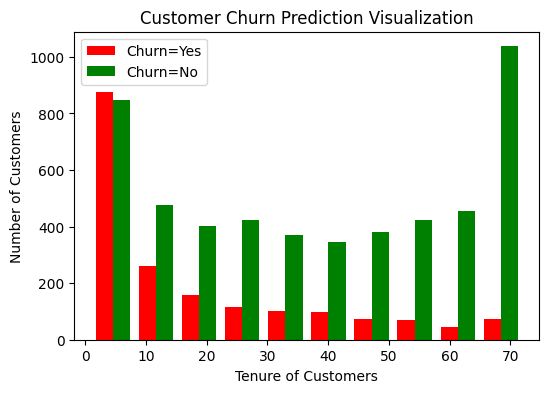

In [13]:
# Tensure of customers leaving the company
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

# Tensure of customers not-leaving the company
tenure_churn_no = df1[df1.Churn == 'No'].tenure

# Now plot a side by side histogram to know the distribution of customers behavious based on their tenure
plt.figure(figsize = (6,4))
plt.xlabel('Tenure of Customers')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')
plt.hist([tenure_churn_yes, tenure_churn_no], color = ['red', 'green'], label = ['Churn=Yes', 'Churn=No'])
plt.legend()
plt.show()

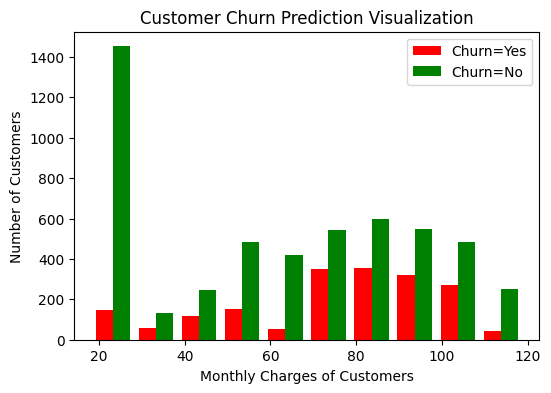

In [14]:
# Monthly Charges of customers leaving the company
monthcharge_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

# Monthly Charges of customers not-leaving the company
monthcharge_churn_no = df1[df1.Churn == 'No'].MonthlyCharges

# Now plot a side by side histogram to know the distribution of customers behavious based on their tenure
plt.figure(figsize = (6,4))
plt.xlabel('Monthly Charges of Customers')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')
plt.hist([monthcharge_churn_yes, monthcharge_churn_no], color = ['red', 'green'], label = ['Churn=Yes', 'Churn=No'])
plt.legend()
plt.show()

### Pre-processing data:

* In this section, we will observe the categorical variables and will do one hot encoding or dummy encoding to give the categorical variables a numeric scense
* Define a function to get the unique entries of categorical columns
* Apply the function on df1 data frame
* Now replace 'No internet service' and 'No phone service' with 'no' using the pandas replace method.
* Convet the gender column in numeric form. 1 for female, 0 for male
* Convert the other columns having more than two unique entries into numeric form using pd.get_dummies method
* Convert the boolean type into uint8 type

In [15]:
# Define a function as get_unique_col_values that will give unique values for caegorical columns
# It will take a data frame object as input
def get_unique_col_values(df):
  for col in df:
    if df[col].dtypes == 'object':
      print(f'{col} : {df[col].unique()}')

In [16]:
# Apply the get_unique_col_values function on df1 data frame
get_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [17]:
# Replace 'No internet service' with 'No'
df1.replace('No internet service', 'No', inplace = True)

# Replace 'No phone service' with 'No'
df1.replace('No phone service', 'No', inplace = True)

In [18]:
# Apply the get_unique_col_values function on df1 one more time
get_unique_col_values(df1) # Now, we can see 'No phone service' and 'No internet service' is ommitted

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [19]:
# Storing the columns having 'Yes' and 'No' values in a list
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

# Run a for loop for replacing the 'Yes' vales to 1 and 'No' values to 0
for cols in yes_no_cols:
  df1[cols].replace({'Yes':1, 'No':0}, inplace = True)

# Observe the unique values of the df1 data frame now
for cols in df1:
  print(f'{cols} : {df1[cols].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [20]:
# For the 'gender' column, replace 'Female' with 1 and 'Male' with 0
df1['gender'].replace({'Female': 1, 'Male': 0}, inplace = True)

In [21]:
# Use the get_dummies method on the 'InternetService', 'Contract' and 'PaymentMethod' column
# Store the result in a data frame called df2
df2 = pd.get_dummies(data = df1, columns = ['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [22]:
# Check the data types of the df2 data frame
df2.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [23]:
# Converting the bolean columns into interger format 'uint8' format
bool_columns = df2.select_dtypes(include=['bool']).columns  # Select boolean columns
df2[bool_columns] = df2[bool_columns].astype('uint8')

# Check final dtypes for df2
df2.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


### Scaling the numeric columns:
Scaling neumeric columns is very useful in machine learning as well as deep learning applications. In this section, we will scale the 'tenure', 'MonthlyCharges' and 'YearlyCharges' column so that they will range from 0 to 1. For this, we will use the MinMaxScaler of sklearn

In [24]:
# Importing the MinMaxScaler of the sklearn library
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler() # Initializing the scaling object

# List the columns to scale as cols_to_scale
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Calculating the scaled version and adding them in the df2 data frame
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

# Check a sample to see the above code is sucessful or not
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5259,0,1,1,0,0.408451,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
5764,0,1,0,0,0.788732,1,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
541,1,0,0,0,0.140845,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1


### Prepairning for model building
* Separating the independent set (X) and dependent set (y): dependent set contains the column 'Churn'
* Train test split the data with 80-20 ratio with random_state 5. For this use the train_test_split function of sklearn

In [25]:
# Separating independent variables as X and dependent variables as y
X = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [26]:
# Train test split the data set using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

# Check the shapes of training and test data
print('Shape of X train set is:', X_train.shape)
print('Shape of X test set is:', X_test.shape)
print('Shape of y train set is:', y_train.shape)
print('Shape of y test set is:', y_test.shape)

Shape of X train set is: (5625, 26)
Shape of X test set is: (1407, 26)
Shape of y train set is: (5625,)
Shape of y test set is: (1407,)


### Build the TensorFlow keras model using ANN
* Name the model as 'model'
* The input layer is of shape 26 (26 columns)
* First hidden layer has 20 nodes with relu
* Output layer has 1 node with sigmoid
* Use adam optimizer
* use binary cross entropy loss
* use accuracy metrics

In [27]:
# Define the model
model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (26,), activation = 'relu'), # Hidden layer with 20 nodes, input shape 26 and relu
    keras.layers.Dense(1, activation = 'sigmoid') # output layer 1 node and sigmoid activation
])

# Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

# Fit the training data into the model
model.fit(X_train, y_train, epochs = 100) # start with 5 epochs

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7448 - loss: 0.5201
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8170 - loss: 0.4089
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8117 - loss: 0.4062
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8138 - loss: 0.4061
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8059 - loss: 0.4127
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8027 - loss: 0.4207
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8074 - loss: 0.4058
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8045 - loss: 0.4099
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8018 - loss: 0.4180
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8116 - loss: 0.3980
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8100 - loss: 0.4016
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [29]:
# Evaluate the model on the test data
model.evaluate(X_test, y_test) # Accuracy on the test data is 77%

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7947 - loss: 0.4432


[0.45647984743118286, 0.7796730399131775]

In [30]:
# Get the predictions using the model as y_pred
y_pred = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [34]:
# How model predictions look like?
y_pred[:5] # Anything less than 0.5 is considered as 0

array([[0.14161599],
       [0.41609696],
       [0.01000685],
       [0.8003305 ],
       [0.59639996]], dtype=float32)

In [35]:
# How acutal test values look like?
y_test[:5]

,Churn
2660,0
744,0
5579,1
64,1
3287,1


In [36]:
# Now we have to manipulate the y_pred variable
# The reason is: it is two dimensional and it doesn't match with y_test
predictions = []
for element in y_pred:
  if element > 0.5:
    predictions.append(1)
  else:
    predictions.append(0)

# Get the actual predictions based on the model
predictions[:5]

[0, 0, 0, 1, 1]

In [42]:
# Calculate the classification report
from sklearn.metrics import classification_report

# Get the classification report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1079
           1       0.52      0.65      0.58       328

    accuracy                           0.78      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.80      0.78      0.79      1407



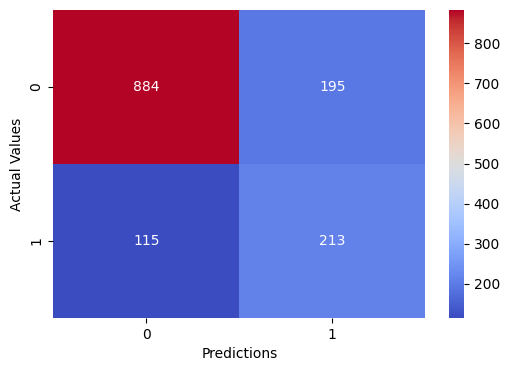

In [43]:
# Calculate the confusion matrix and plot it using a heatmap
cnfm = tf.math.confusion_matrix(predictions, y_test)

# Plot the confuision matrix using seaborn heatmap
import seaborn as sns
plt.figure(figsize = (6,4))
sns.heatmap(cnfm, annot = True, fmt = 'd', cmap = 'coolwarm')
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
plt.show()